C:\Users\abbas\AppData\Local\Temp\ipykernel_28996\2808979371.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = label_encoder.fit_transform(selected_data[col])
C:\Users\abbas\AppData\Local\Temp\ipykernel_28996\2808979371.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = label_encoder.fit_transform(selected_data[col])
C:\Users\abbas\AppData\Local\Temp\ipykernel_28996\2808979371.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

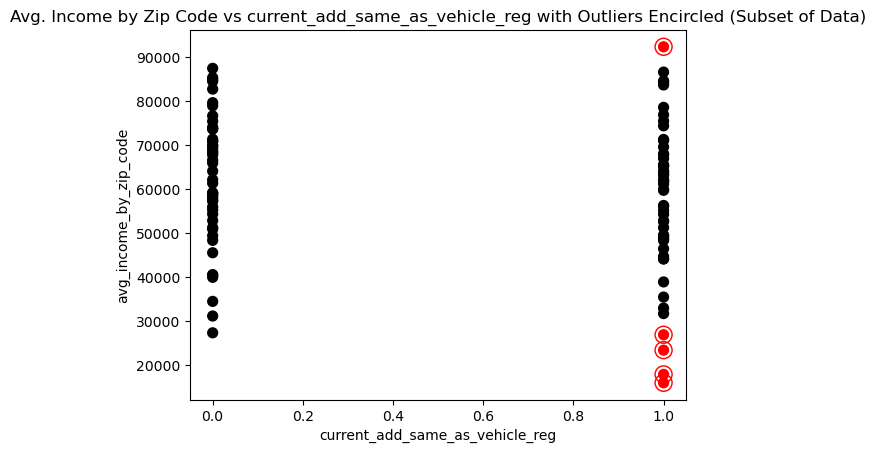

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor

# Load the dataset
insurance_data = pd.read_csv("C:/Users/abbas/OneDrive/Desktop/Practice Datasets/Desjardins Project/Dataset.csv")

categorical_vars = ["driver_gender", "current_add_same_as_vehicle_reg", 
                     "historical_legal_issues", "is_individual_policy_holder",
                     "vehicle_registration_address_verified"]
numeric_vars = ["premium_amount","avg_income_by_zip_code","num_vehicle_changes", 
                 "anomalies_payment_history","crime_rate","num_address_changes"]

selected_data = insurance_data[categorical_vars + numeric_vars]

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_vars:
    selected_data[col] = label_encoder.fit_transform(selected_data[col])

# Choose a categorical variable for the x-axis and premium for the y-axis
x_var = "current_add_same_as_vehicle_reg"
y_var = "avg_income_by_zip_code"

# Select a fraction of the data for visualization
fraction = 0.01
num_points = int(len(selected_data) * fraction)
random_indices = np.random.choice(len(selected_data), num_points, replace=False)
selected_data_sample = selected_data.loc[random_indices]

# Fit LOF model on the sampled data
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # You can adjust these parameters
y_pred_sample = lof.fit_predict(selected_data_sample[numeric_vars])

# Plot the data points
plt.scatter(selected_data_sample[x_var], selected_data_sample[y_var], c=['red' if i == -1 else 'black' for i in y_pred_sample], s=50)

# Encircle outliers with red circles
outliers = selected_data_sample[y_pred_sample == -1]
plt.scatter(outliers[x_var], outliers[y_var], facecolors='none', edgecolors='red', s=150)

plt.title(f'Avg. Income by Zip Code vs {x_var} with Outliers Encircled (Subset of Data)')
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.show()


C:\Users\abbas\AppData\Local\Temp\ipykernel_28996\1077951722.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = label_encoder.fit_transform(selected_data[col])
C:\Users\abbas\AppData\Local\Temp\ipykernel_28996\1077951722.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = label_encoder.fit_transform(selected_data[col])
C:\Users\abbas\AppData\Local\Temp\ipykernel_28996\1077951722.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

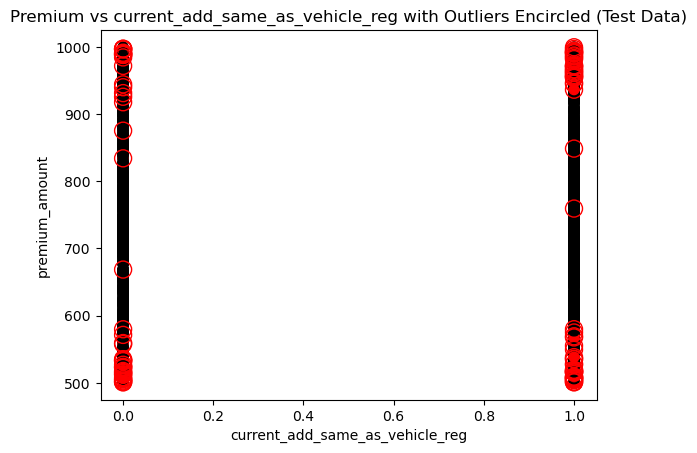

In [2]:
# Predit on new data points
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor

# Load the dataset
insurance_data = pd.read_csv("C:/Users/abbas/OneDrive/Desktop/Practice Datasets/Desjardins Project/Dataset.csv")

categorical_vars = ["driver_gender", "current_add_same_as_vehicle_reg", 
                     "historical_legal_issues", "is_individual_policy_holder",
                     "vehicle_registration_address_verified"]
numeric_vars = ["premium_amount","avg_income_by_zip_code","num_vehicle_changes", 
                 "anomalies_payment_history","crime_rate","num_address_changes"]

selected_data = insurance_data[categorical_vars + numeric_vars]

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_vars:
    selected_data[col] = label_encoder.fit_transform(selected_data[col])

# Choose a categorical variable for the x-axis and premium for the y-axis
x_var = "current_add_same_as_vehicle_reg"
y_var = "premium_amount"

# Split the data into training and test sets
train_data, test_data = train_test_split(selected_data, test_size=0.2, random_state=42)

# Fit LOF model on the training data
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=True)  # You can adjust these parameters
lof.fit(train_data[numeric_vars])

# Perform predictions on the test data
y_pred_test = lof.predict(test_data[numeric_vars])

# Plot the data points
plt.scatter(test_data[x_var], test_data[y_var], c=['red' if i == -1 else 'black' for i in y_pred_test], s=50)

# Encircle outliers with red circles
outliers = test_data[y_pred_test == -1]
plt.scatter(outliers[x_var], outliers[y_var], facecolors='none', edgecolors='red', s=150)

plt.title(f'Premium vs {x_var} with Outliers Encircled (Test Data)')
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.show()


C:\Users\abbas\AppData\Local\Temp\ipykernel_28996\3203653016.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = label_encoder.fit_transform(selected_data[col])
C:\Users\abbas\AppData\Local\Temp\ipykernel_28996\3203653016.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = label_encoder.fit_transform(selected_data[col])
C:\Users\abbas\AppData\Local\Temp\ipykernel_28996\3203653016.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

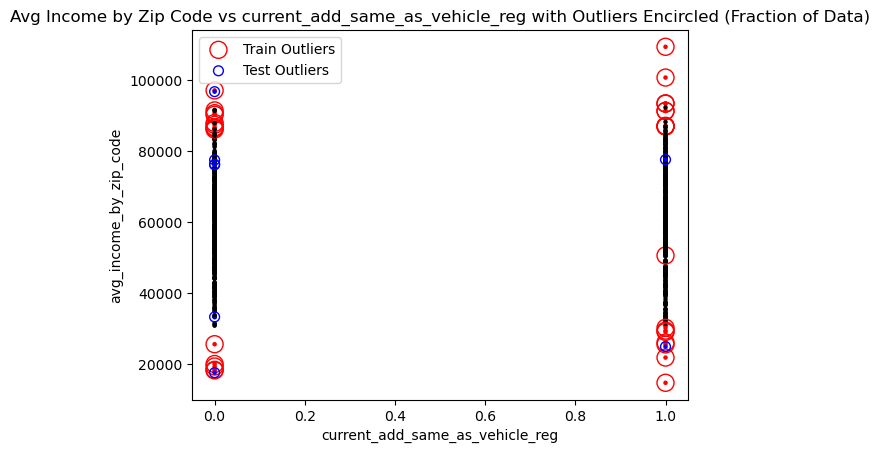

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor

# Load the dataset
insurance_data = pd.read_csv("C:/Users/abbas/OneDrive/Desktop/Practice Datasets/Desjardins Project/Dataset.csv")

categorical_vars = ["driver_gender", "current_add_same_as_vehicle_reg", 
                     "historical_legal_issues", "is_individual_policy_holder",
                     "vehicle_registration_address_verified"]
numeric_vars = ["premium_amount","avg_income_by_zip_code","num_vehicle_changes", 
                 "anomalies_payment_history","crime_rate","num_address_changes"]

selected_data = insurance_data[categorical_vars + numeric_vars]

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_vars:
    selected_data[col] = label_encoder.fit_transform(selected_data[col])

# Choose a categorical variable for the x-axis and premium for the y-axis
x_var = "current_add_same_as_vehicle_reg"
y_var = "avg_income_by_zip_code"

# Split the data into training and test sets
train_data, test_data = train_test_split(selected_data, test_size=0.2, random_state=42)

# Select a fraction of the data for visualization
fraction = 0.08
num_points_train = int(len(train_data) * fraction)
num_points_test = int(len(test_data) * fraction)

random_indices_train = np.random.choice(len(train_data), num_points_train, replace=False)
random_indices_test = np.random.choice(len(test_data), num_points_test, replace=False)

selected_train_data = train_data.iloc[random_indices_train]
selected_test_data = test_data.iloc[random_indices_test]

# Fit LOF model on the training data
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # You can adjust these parameters
y_pred_train = lof.fit_predict(selected_train_data[numeric_vars])

# Perform predictions on the test data
y_pred_test = lof.fit_predict(selected_test_data[numeric_vars])

# Plot the data points for training data
plt.scatter(selected_train_data[x_var], selected_train_data[y_var], c=['red' if i == -1 else 'black' for i in y_pred_train], s=5)

# Encircle outliers with red circles
outliers_train = selected_train_data[y_pred_train == -1]
plt.scatter(outliers_train[x_var], outliers_train[y_var], facecolors='none', edgecolors='red', s=150, label='Train Outliers')

# Plot the data points for test data
plt.scatter(selected_test_data[x_var], selected_test_data[y_var], c=['blue' if i == -1 else 'black' for i in y_pred_test], s=5)

# Encircle outliers with blue circles
outliers_test = selected_test_data[y_pred_test == -1]
plt.scatter(outliers_test[x_var], outliers_test[y_var], facecolors='none', edgecolors='blue', s=50, label='Test Outliers')

plt.title(f'Avg Income by Zip Code vs {x_var} with Outliers Encircled (Fraction of Data)')
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.legend()
plt.show()
